In [137]:
import os
from dotenv import load_dotenv


In [138]:
load_dotenv()
GROQ_API_KEY = os.getenv('GROQ_API_KEY')
os.environ['LANGCHAIN_PROJECT'] = "LangGraph"

In [139]:
from langchain_groq import ChatGroq

In [140]:
llm = ChatGroq(model_name="Gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f720c1d4d90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f720c1706d0>, model_name='Gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Building chatbot using langgraph

In [141]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [142]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)
graph_builder

In [143]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}


In [144]:
graph_builder.add_node('chatbot',chatbot)

In [145]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [146]:
graph = graph_builder.compile()

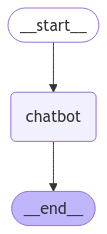

In [147]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)

In [148]:

while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    # print(event)
    for value in event.values():
      if value :
        print(value['messages'])
        print("Assistant:",value["messages"].content)

content='Hi! 👋 \n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 7e-07, 'queue_time': 0.013830749, 'total_time': 0.029091609}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-0c7b5e66-69b4-4af8-8dc6-7215ba253d67-0' usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26}
Assistant: Hi! 👋 

How can I help you today? 😊

content='As a large language model, I have no memory of past conversations and do not know you personally. Every interaction we have is a fresh start.\n\nHow can I help you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 14, 'total_tokens': 54, 'completion_time': 0.072727273, 'prompt_time': 0.000102299, 'queue_time': 0.014712081, 'total_time': 0.072829572}, 'model_name': 